In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospitals-and-beds-in-india/Hospitals_and_Beds_statewise.csv
/kaggle/input/hospitals-and-beds-in-india/Metadata.csv
/kaggle/input/hospitals-and-beds-in-india/Hospitals and Beds maintained by Ministry of Defence.csv
/kaggle/input/hospitals-and-beds-in-india/Number of Government Hospitals and Beds in Rural and Urban Areas .csv
/kaggle/input/hospitals-and-beds-in-india/Employees State Insurance Corporation .csv
/kaggle/input/hospitals-and-beds-in-india/AYUSHHospitals.csv
/kaggle/input/hospitals-and-beds-in-india/Hospitals and beds maintained by Railways.csv


In [2]:
# Importing Datasets

df_ayush=pd.read_csv('../input/hospitals-and-beds-in-india/AYUSHHospitals.csv')
df_insurance=pd.read_csv('../input/hospitals-and-beds-in-india/Employees State Insurance Corporation .csv')
df_defence=pd.read_csv('../input/hospitals-and-beds-in-india/Hospitals and Beds maintained by Ministry of Defence.csv')
df_rail=pd.read_csv('../input/hospitals-and-beds-in-india/Hospitals and beds maintained by Railways.csv')
df_state=pd.read_csv('../input/hospitals-and-beds-in-india/Hospitals_and_Beds_statewise.csv')
df_gov=pd.read_csv('../input/hospitals-and-beds-in-india/Number of Government Hospitals and Beds in Rural and Urban Areas .csv')

In [3]:
# Changing column names 
df_ayush.rename (columns = {'Number of Hospitals': 'Government Hospitals', 'Unnamed: 3':'Local Body Hospitals',
                            'Unnamed: 4' : 'Other Hospitals' , 'Unnamed: 5' : 'Total Hospitals',
                            'Number of Beds': 'Government Beds', 'Unnamed: 7': 'Local Body Beds','Unnamed: 8' : 'Other Beds',
                           'Unnamed: 9': 'Total Beds','Srl no.':'S. No.'}, inplace = True)
df_insurance.rename (columns = {'Employees State Insurance Corporation Hospitals and beds (as on 31.03.2017)': 'S. No.',
                                'Unnamed: 1':'State / UT','Unnamed: 2' : 'Total Hospitals','Unnamed: 3' : 'Total Beds'},
                     inplace = True)
df_defence.rename (columns = {'Name of State': 'State / UT','No. of Hospitals':'Total Hospitals','No. of beds' : 'Total Beds'},
                     inplace = True)
df_rail.rename (columns = {'Number of Hospitals and beds in Railways (as on 21/03/2018)': 'S. No.','Unnamed: 1':'Zone / PU',
                           'Unnamed: 2' : 'Total Hospitals','Unnamed: 3' : 'Total Beds'},inplace = True)
df_state.rename (columns = {'Unnamed: 0': 'State / UT','PHC':'Primary Health Centers','CHC':'Community Health Centers',
                            'SDH':'Sub-District/Divisional Hospitals','DH':'District Hospitals','Total':'Total Hospitals',
                            'Unnamed: 6':'Total Beds'},inplace = True)
df_gov.rename (columns = {'States/UTs': 'State / UT','Rural hospitals':'Rural Hospitals','Unnamed: 2':'Rural Beds',
                            'Urban hospitals':'Urban Hospitals','Unnamed: 4':'Urban Beds'},inplace = True)

In [4]:
# Dropping first row from the datasets
df_ayush = df_ayush.drop(0)
df_ayush = df_ayush.drop(1)
df_ayush=df_ayush.drop([38,39,40,41,42])
df_insurance = df_insurance.drop(0)
df_insurance.drop([29,30,31,32],inplace=True)
df_rail=df_rail.drop(0)
df_gov=df_gov.drop(0)
df_defence.drop([29,30],inplace=True)
df_rail.drop(26,inplace=True)
df_gov.drop(37,inplace=True)


# Converting Object to Int fields
df_ayush[['Government Hospitals','Local Body Hospitals','Other Hospitals','Total Hospitals','Government Beds',
          'Local Body Beds','Other Beds','Total Beds']]=df_ayush[['Government Hospitals','Local Body Hospitals','Other Hospitals','Total Hospitals','Government Beds',
          'Local Body Beds','Other Beds','Total Beds']].astype(int)
df_insurance[['Total Hospitals', 'Total Beds']]=df_insurance[['Total Hospitals', 'Total Beds']].astype(int)
df_defence[['Total Hospitals', 'Total Beds']]=df_defence[['Total Hospitals', 'Total Beds']].astype(int)
df_rail[['Total Hospitals', 'Total Beds']]=df_rail[['Total Hospitals', 'Total Beds']].astype(int)
df_gov[['Rural Hospitals', 'Rural Beds','Urban Hospitals','Urban Beds']]=df_gov[['Rural Hospitals', 'Rural Beds',
                                                                                       'Urban Hospitals','Urban Beds']].astype(int)
df_gov['As on'] = pd.to_datetime(df_gov['As on'])
df_gov['Total Hospitals']=df_gov['Rural Hospitals']+df_gov['Urban Hospitals']
df_gov['Total Beds']=df_gov['Rural Beds']+df_gov['Urban Beds']

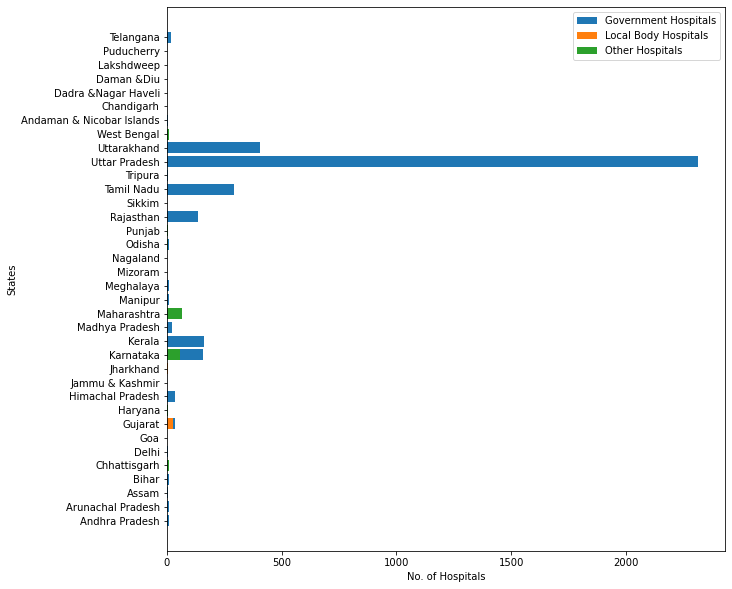

In [5]:
# Seeing the distribution of AYUSH Hospitals by State

plt.figure(figsize=(10,10))
plt.barh(df_ayush['State / UT'],df_ayush['Government Hospitals'], label = 'Government Hospitals')
plt.barh(df_ayush['State / UT'],df_ayush['Local Body Hospitals'], label = 'Local Body Hospitals')
plt.barh(df_ayush['State / UT'],df_ayush['Other Hospitals'], label = 'Other Hospitals')
plt.ylabel('States')
plt.xlabel('No. of Hospitals')
plt.legend()
plt.show()

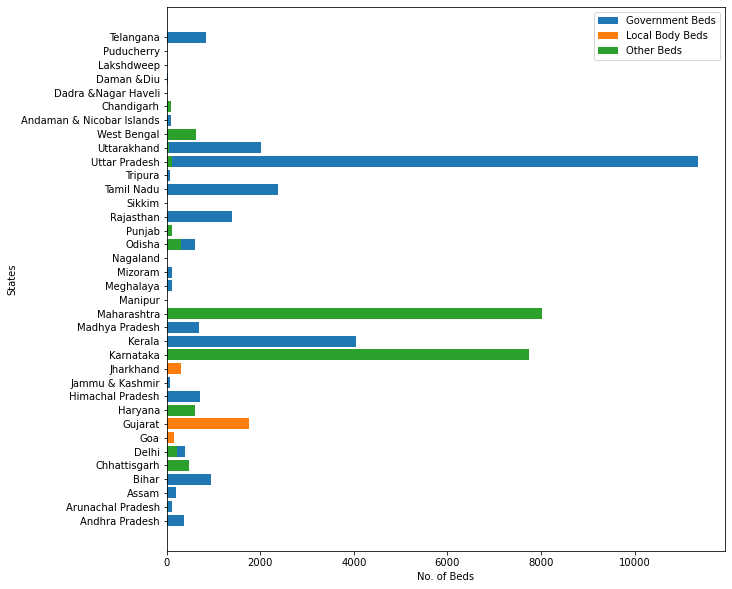

In [6]:
# Seeing the distribution of AYUSH Beds by State

plt.figure(figsize=(10,10))
plt.barh(df_ayush['State / UT'],df_ayush['Government Beds'], label = 'Government Beds')
plt.barh(df_ayush['State / UT'],df_ayush['Local Body Beds'], label = 'Local Body Beds')
plt.barh(df_ayush['State / UT'],df_ayush['Other Beds'], label = 'Other Beds')
plt.ylabel('States')
plt.xlabel('No. of Beds')
plt.legend()
plt.show()

Text(0.5, 1.0, 'States with highest AYUSH Beds')

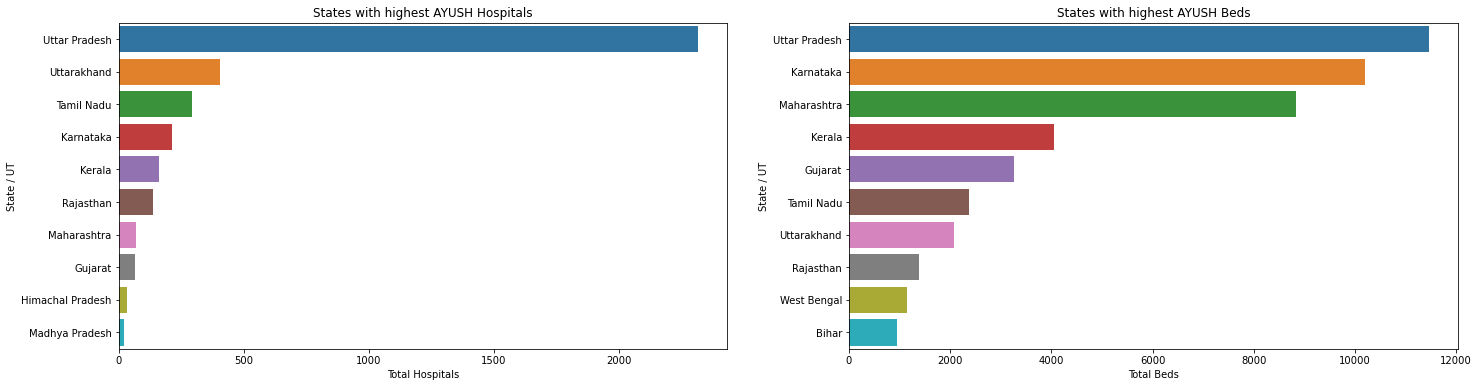

In [7]:
# Seeing the distribution of AYUSH Hospitals and Beds in Total by state

fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Total Hospitals',y='State / UT',ax=ax[0],data=df_ayush.sort_values(by='Total Hospitals',ascending=False).head(10)).set_title('States with highest AYUSH Hospitals')
sns.barplot(x='Total Beds',y='State / UT',ax=ax[1],data=df_ayush.sort_values(by='Total Beds',ascending=False).head(10)).set_title('States with highest AYUSH Beds')

# **AYUSH Observations:**

* UP is the clear leader in terms of AYUSH Hospitals and Beds
* Other states that have a good coverage of AYUSH Hospitals: Uttarakhand, Tamil Nadu, Rajasthan, Kerala, Karnataka
* Some highly dense states have very low coverage of AYUSH Hospitals - West Bengal, Punjab, Maharashtra, Madhya Pradesh, Gujarat, Delhi, & Bihar, although they do have AYUSH Bed coverage that is considerable
* North-East India has negligible coverage of AYUSH Hospitals. Is this a acceptance issue or due to lack of government efforts?

Text(0.5, 1.0, 'States with highest Employees State Insurance Corporation Beds by State')

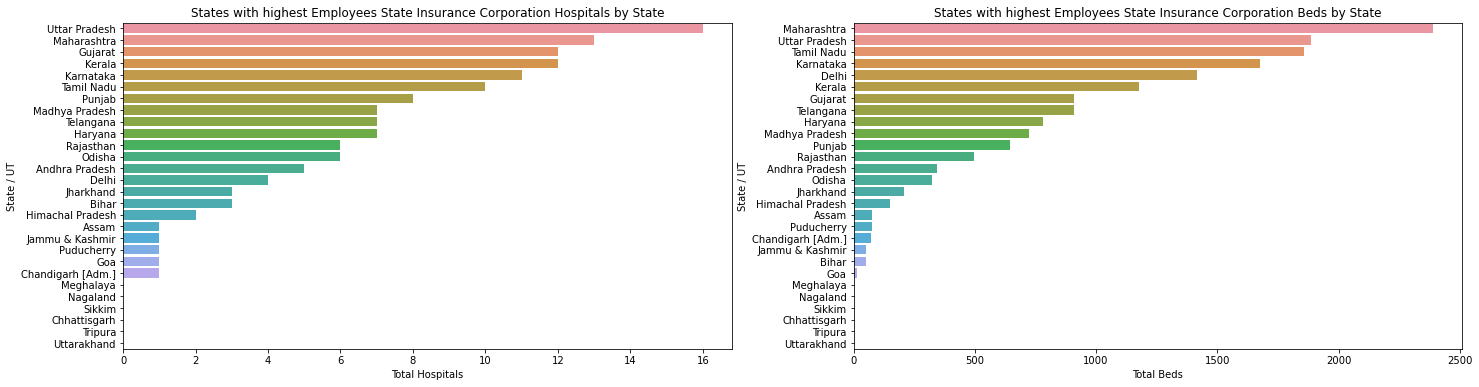

In [8]:
# Seeing the distribution of Employees State Insurance Corporation Hospitals and Beds by State

fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Total Hospitals',y='State / UT',ax=ax[0],data=df_insurance.sort_values(by='Total Hospitals',ascending=False)).set_title('States with highest Employees State Insurance Corporation Hospitals by State')
sns.barplot(x='Total Beds',y='State / UT',ax=ax[1],data=df_insurance.sort_values(by='Total Beds',ascending=False)).set_title('States with highest Employees State Insurance Corporation Beds by State')

Text(0.5, 1.0, 'States with highest Defence Beds')

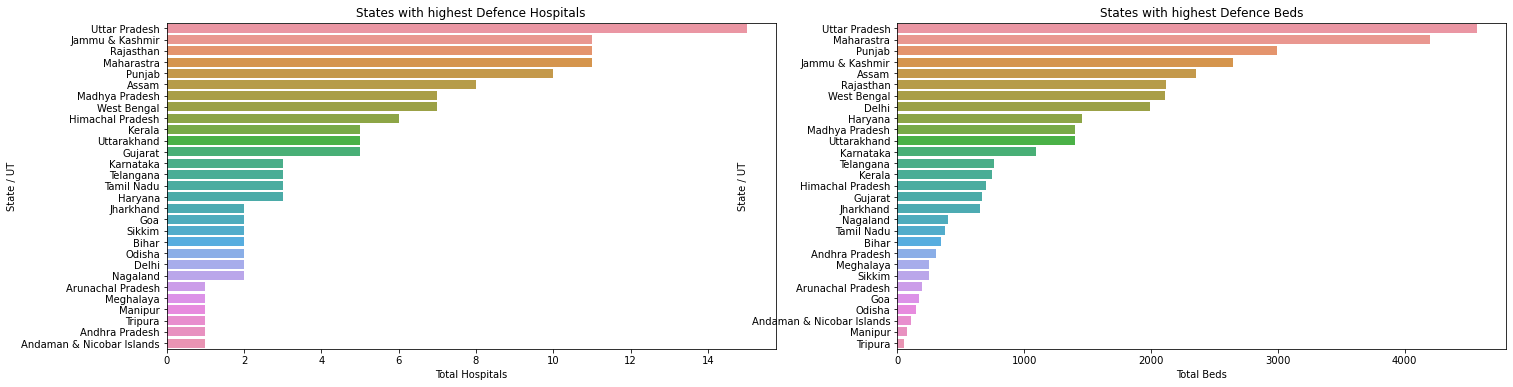

In [9]:
# Seeing the distribution of Defence maintained Hospitals and Beds by State

fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Total Hospitals',y='State / UT',ax=ax[0],data=df_defence.sort_values(by='Total Hospitals',ascending=False)).set_title('States with highest Defence Hospitals')
sns.barplot(x='Total Beds',y='State / UT',ax=ax[1],data=df_defence.sort_values(by='Total Beds',ascending=False)).set_title('States with highest Defence Beds')

Text(0.5, 1.0, 'Railway Beds by Zone')

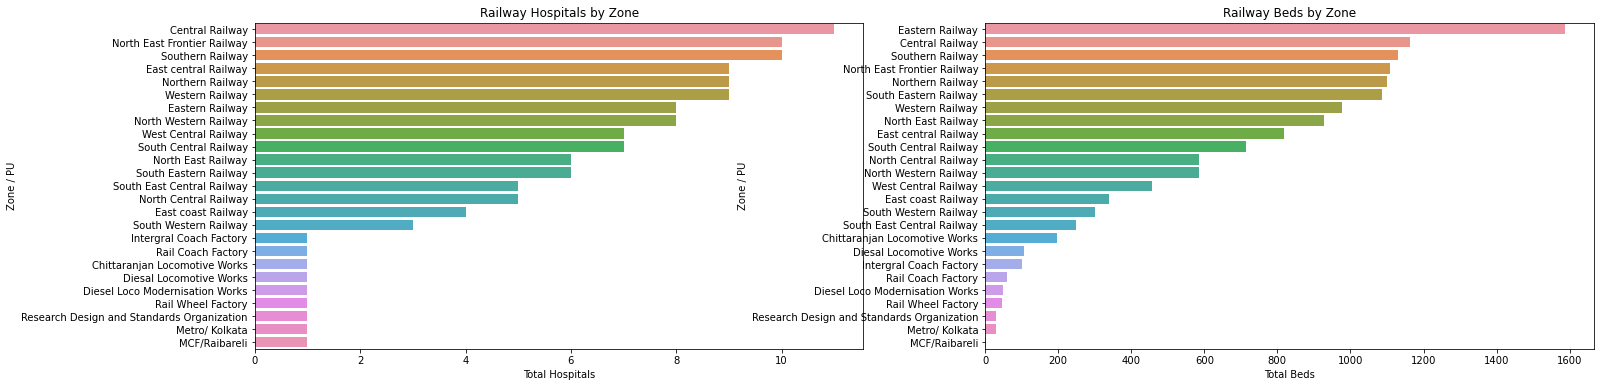

In [10]:
# Seeing the distribution of Railway maintained Hospitals and Beds

fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Total Hospitals',y='Zone / PU',ax=ax[0],data=df_rail.sort_values(by='Total Hospitals',ascending=False)).set_title('Railway Hospitals by Zone')
sns.barplot(x='Total Beds',y='Zone / PU',ax=ax[1],data=df_rail.sort_values(by='Total Beds',ascending=False)).set_title('Railway Beds by Zone')

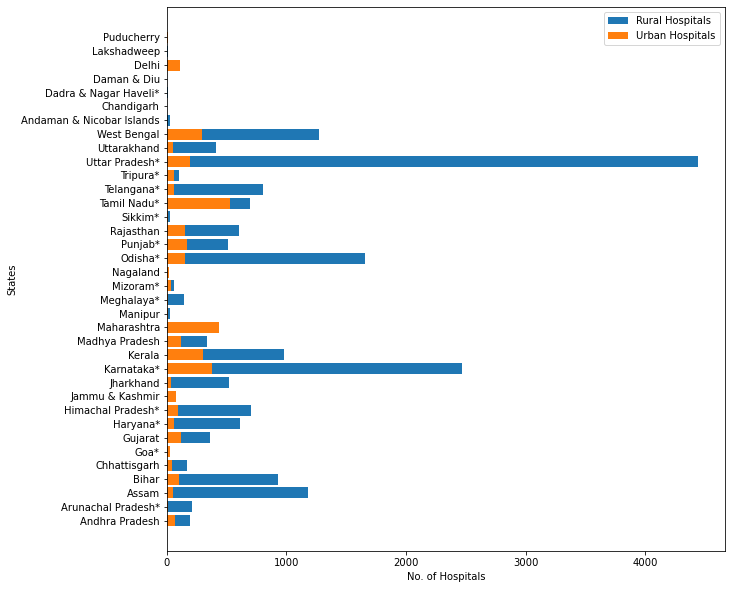

In [11]:
# Seeing the distribution of Rural and Urban Hospitals by State

plt.figure(figsize=(10,10))
plt.barh(df_gov['State / UT'],df_gov['Rural Hospitals'], label = 'Rural Hospitals')
plt.barh(df_gov['State / UT'],df_gov['Urban Hospitals'], label = 'Urban Hospitals')
plt.ylabel('States')
plt.xlabel('No. of Hospitals')
plt.legend()
plt.show()

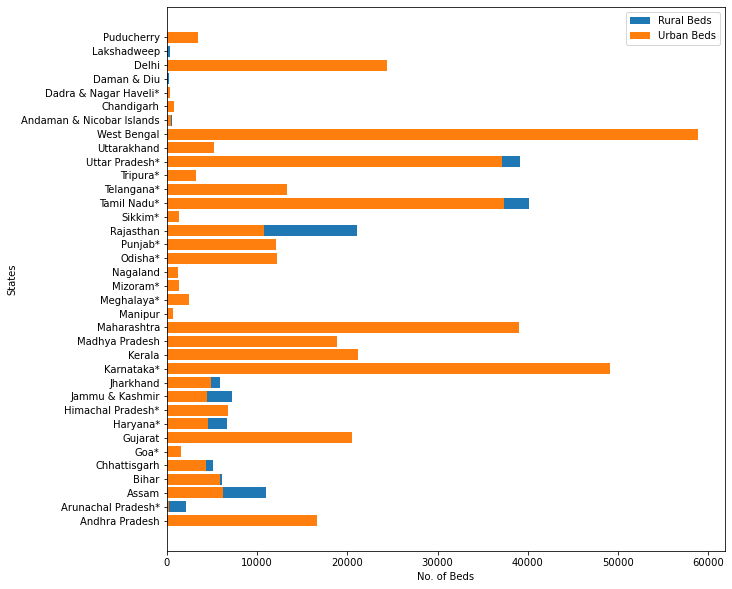

In [12]:
# Seeing the distribution of Rural and Urban Beds by State

plt.figure(figsize=(10,10))
plt.barh(df_gov['State / UT'],df_gov['Rural Beds'], label = 'Rural Beds')
plt.barh(df_gov['State / UT'],df_gov['Urban Beds'], label = 'Urban Beds')
plt.ylabel('States')
plt.xlabel('No. of Beds')
plt.legend()
plt.show()

Text(0, 0.5, 'Number of Hospitals')

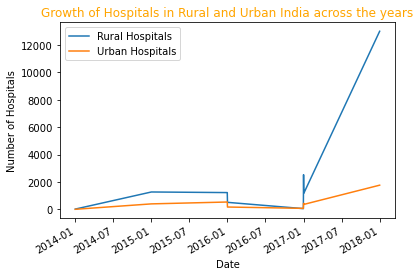

In [13]:
pd.pivot_table(df_gov,index=['As on'],values=['Rural Hospitals','Urban Hospitals'],aggfunc=np.sum).plot()
plt.title("Growth of Hospitals in Rural and Urban India across the years", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Hospitals")

Text(0, 0.5, 'Number of Beds')

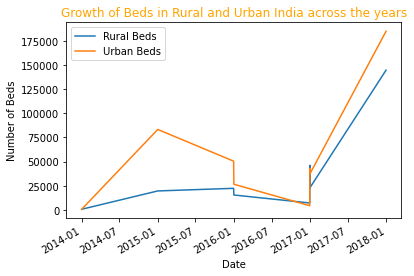

In [14]:
pd.pivot_table(df_gov,index=['As on'],values=['Rural Beds','Urban Beds'],aggfunc=np.sum).plot()
plt.title("Growth of Beds in Rural and Urban India across the years", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Beds")

# **Observations for Government Health in Urban and Rural India:**

* Rural Hospitals far outnumber Urban Hospitals in almost all states barring Delhi, Tamil Nadu, Maharashtra, J & K, and Goa
* Clear leaders are Uttar Pradesh, West Bengal, Odisha (Surprise!!) and Karnataha
* Highly dense states such as Bihar, Haryana, Madhya Pradesh and Maharashtra have far lower government hospitals and beds
* Growth in Rural Hospitals has skyrocketed since 2017, while beds have increased almost at a similar rate in Rural and Urban India